# RoleSim
----
Similarity measure from the **automorphic** equivalence family.

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

from RoleSim.RoleSim import *

In [ ]:
def get_n_pairs(matrix, sim_score=0.8):
    '''
    Helper function to return the number of similar pairs
    with the desired similarity score.
    '''
    return np.count_nonzero(~np.isnan(matrix[matrix >= sim_score])) - matrix.shape[0]

## Posts and Replies

### small sample, using *replies-276.graphml*

In [8]:
# Load directed graph
directed_graph = nx.read_graphml('graphs/replies-276.graphml')
# Convert the graph to an undirected graph
actual_data_graph = directed_graph.to_undirected()
# Remove any nodes with no edges
actual_data_graph.remove_nodes_from(list(nx.isolates(actual_data_graph)))
print(f"Number of nodes: {actual_data_graph.number_of_nodes()}")
print(f"Number of edges: {actual_data_graph.number_of_edges()}")

Number of nodes: 276
Number of edges: 880


In [9]:
# Create mapping dictionaries
node_to_index_dict = {node: idx for idx, node in enumerate(actual_data_graph.nodes())}
index_to_node_dict = {idx: node for node, idx in node_to_index_dict.items()}
# Relabel the graph nodes to integers
global actual_data_graph
actual_data_graph = nx.relabel_nodes(actual_data_graph, node_to_index_dict)
print(f"Number of nodes: {actual_data_graph.number_of_nodes()}")
print(f"Number of edges: {actual_data_graph.number_of_edges()}")

Number of nodes: 276
Number of edges: 880


In [10]:
# Run RoleSim on graph
current_iteration = full_operation(actual_data_graph)
# Save the final RoleSim similarity graph?
# nx.write_graphml(current_iteration, 'RoleSim/role_similarity-small.graphml')

666  nodes were inserted in the graph.
31019  nodes were pruned by rule 1.
2829  nodes were pruned by rule 2.
3436  nodes were pruned by rule 3.
142
666
[0, 32, 33, 48, 67, 83, 108, 178, 212, 213, 251, 271, 272, 1, 26, 188, 197, 205, 248, 3, 50, 79, 101, 112, 119, 120, 128, 154, 161, 252, 5, 14, 40, 55, 68, 151, 160, 209, 211, 273, 7, 61, 74, 86, 124, 158, 170, 214, 274, 11, 169, 263, 12, 13, 52, 15, 92, 268, 16, 17, 204, 223, 20, 236, 239, 21, 49, 90, 104, 227, 23, 41, 42, 116, 126, 186, 222, 232, 266, 29, 121, 145, 30, 31, 56, 96, 152, 187, 215, 247, 45, 46, 193, 99, 134, 173, 176, 184, 218, 51, 129, 149, 58, 69, 70, 136, 76, 80, 89, 138, 91, 275, 93, 237, 94, 133, 105, 115, 224, 132, 243, 137, 242, 141, 146, 148, 150, 200, 269, 155, 256, 167, 174, 177, 180, 196, 201, 202, 207, 210, 260, 270]
[(0, 32), (0, 33), (0, 48), (0, 67), (0, 83), (0, 108), (0, 178), (0, 212), (0, 213), (0, 251), (0, 271), (0, 272), (32, 17), (32, 26), (32, 83), (32, 212), (33, 83), (33, 212), (33, 271), (33, 

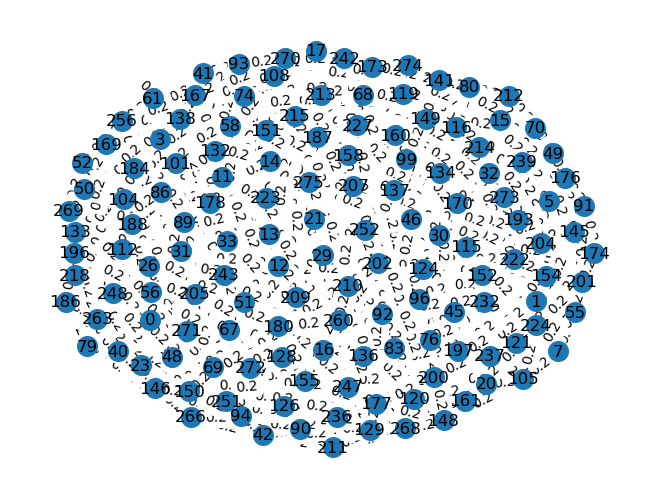

In [11]:
# Draw the graph with edge weights
pos = nx.spring_layout(current_iteration)
edge_labels = nx.get_edge_attributes(current_iteration, 'weight')
nx.draw(current_iteration, pos, with_labels=True, node_size=200)
nx.draw_networkx_edge_labels(current_iteration, pos, edge_labels=edge_labels)
plt.show()

In [31]:
# Load the similarity graph
# similarity_graph = nx.read_graphml('RoleSim/role_similarity-small.graphml')
similarity_graph = current_iteration

In [33]:
# Get the list of nodes and create a mapping for sequential indices
nodes = list(similarity_graph.nodes())
node_to_index = {node: idx for idx, node in enumerate(nodes)}
n = len(nodes)

# Initialize the dissimilarity matrix
dissimilarity_matrix = np.ones((n, n))  # Start with all ones (max dissimilarity)

# Fill in the matrix with 1 - similarity scores
for edge in similarity_graph.edges(data=True):
    source = node_to_index[edge[0]]  # Map source node to sequential index
    target = node_to_index[edge[1]]  # Map target node to sequential index
    similarity = edge[2].get('weight', 0)  # Similarity score (default 0)
    dissimilarity = 1 - similarity
    dissimilarity_matrix[source, target] = dissimilarity
    dissimilarity_matrix[target, source] = dissimilarity  # Ensure symmetry

In [34]:
# Create a DataFrame for easier handling
dissimilarity_df = pd.DataFrame(dissimilarity_matrix, index=nodes, columns=nodes)
dissimilarity_df.head()

,0,32,33,48,67,83,108,178,212,213,...,174,177,180,196,201,202,207,210,260,270
0,1.0,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,...,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8
32,0.8,1.0,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,...,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8
33,0.8,0.8,1.0,0.8,0.8,0.8,0.8,0.8,0.8,0.8,...,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8
48,0.8,0.8,0.8,1.0,0.8,0.8,0.8,0.8,0.8,0.8,...,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8
67,0.8,0.8,0.8,0.8,1.0,0.8,0.8,0.8,0.8,0.8,...,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8


In [36]:
# Save the matrix to a CSV file
dissimilarity_df.to_csv('results/rolesim/replies-276-dissimilarity-matrix.csv', index=True)

### full dataset, using *df_edge_list_directed_users_postings_replies.parquet*

In [39]:
# Load .parquet data
postings_replies = pd.read_parquet('data/df_edge_list_directed_users_postings_replies.parquet')

#### subset of 0.5% from full data

In [40]:
# Randomly sample 0.5% of data
subset_postings_replies = postings_replies.sample(frac=0.005, random_state=1)
subset_postings_replies.head()

,ID_CommunityIdentity_Source,ID_CommunityIdentity_Target,count_posting_replies
781028,510681,66166,2
68617,26559,565355,4
620033,238360,501957,1
682167,499467,581430,2
789575,512318,573052,1


In [41]:
# Create undirected graph from the .parquet data
G = nx.Graph()
# Add edges to the graph, assuming count_posting_replies is the weight of the edges
for _, row in subset_postings_replies.iterrows():
    source = row['ID_CommunityIdentity_Source']
    target = row['ID_CommunityIdentity_Target']
    weight = row['count_posting_replies']
    if G.has_edge(source, target):
        G[source][target]['weight'] += weight  # Combine weights if edge exists
    else:
        G.add_edge(source, target, weight=weight)
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

Number of nodes: 4611
Number of edges: 6232


In [42]:
# Convert the graph to an undirected graph
actual_data_graph = G.to_undirected()
# Remove any nodes with no edges
actual_data_graph.remove_nodes_from(list(nx.isolates(actual_data_graph)))
print(f"Number of nodes: {actual_data_graph.number_of_nodes()}")
print(f"Number of edges: {actual_data_graph.number_of_edges()}")

Number of nodes: 4611
Number of edges: 6232


In [43]:
# Create mapping dictionaries
node_to_index_dict = {node: idx for idx, node in enumerate(actual_data_graph.nodes())}
index_to_node_dict = {idx: node for node, idx in node_to_index_dict.items()}
# Relabel the graph nodes to integers
actual_data_graph = nx.relabel_nodes(actual_data_graph, node_to_index_dict)
print(f"Number of nodes: {actual_data_graph.number_of_nodes()}")
print(f"Number of edges: {actual_data_graph.number_of_edges()}")

Number of nodes: 4611
Number of edges: 6232


In [ ]:
# Run RoleSim on graph
current_iteration = full_operation(actual_data_graph)
# Save the final RoleSim similarity graph?
nx.write_graphml(current_iteration, f'results/rolesim/replies-{G.number_of_nodes()}-similarity.graphml')

1804  nodes were inserted in the graph.
7879132  nodes were pruned by rule 1.
1516696  nodes were pruned by rule 2.
1230723  nodes were pruned by rule 3.
1618
1804
[5, 727, 1378, 2057, 3090, 4217, 4537, 4540, 11, 3267, 3672, 16, 1801, 2675, 22, 23, 3089, 37, 3904, 50, 709, 2714, 3194, 53, 2780, 56, 927, 59, 4032, 4183, 64, 65, 74, 762, 1250, 2639, 3027, 3148, 4136, 4422, 4583, 87, 2771, 88, 89, 109, 652, 2124, 4051, 119, 592, 3903, 126, 3173, 3445, 128, 3676, 4265, 4420, 138, 2364, 2749, 3038, 3550, 142, 1537, 1854, 3100, 3921, 155, 156, 157, 161, 3411, 174, 1249, 2023, 178, 3824, 183, 491, 1702, 1972, 3533, 4406, 192, 1353, 4347, 204, 205, 217, 1377, 2798, 229, 230, 233, 1351, 1797, 2002, 2616, 236, 3241, 4438, 239, 4146, 4559, 240, 241, 245, 1696, 249, 3753, 4268, 253, 4036, 267, 3058, 277, 1758, 4085, 289, 3425, 293, 2832, 3842, 297, 298, 302, 1561, 317, 868, 2311, 4586, 325, 3386, 4549, 327, 328, 331, 332, 345, 346, 347, 2702, 3785, 3916, 349, 2258, 350, 2797, 357, 364, 3481, 373, 

In [45]:
# Load the similarity graph
# similarity_graph = nx.read_graphml('RoleSim/role_similarity.graphml')
similarity_graph = current_iteration

In [46]:
# Get the list of nodes and create a mapping for sequential indices
nodes = list(similarity_graph.nodes())
node_to_index = {node: idx for idx, node in enumerate(nodes)}
n = len(nodes)

# Initialize the dissimilarity matrix
dissimilarity_matrix = np.ones((n, n))  # Start with all ones (max dissimilarity)

# Fill in the matrix with 1 - similarity scores
for edge in similarity_graph.edges(data=True):
    source = node_to_index[edge[0]]  # Map source node to sequential index
    target = node_to_index[edge[1]]  # Map target node to sequential index
    similarity = edge[2].get('weight', 0)  # Similarity score (default 0)
    dissimilarity = 1 - similarity
    dissimilarity_matrix[source, target] = dissimilarity
    dissimilarity_matrix[target, source] = dissimilarity  # Ensure symmetry

In [47]:
# Create a DataFrame for easier handling
dissimilarity_df = pd.DataFrame(dissimilarity_matrix, index=nodes, columns=nodes)
dissimilarity_df.head()

,5,727,1378,2057,3090,4217,4537,4540,11,3267,...,4533,4534,4535,4541,4597,4598,4602,4603,4608,4609
5,1.0,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,...,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8
727,0.8,1.0,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,...,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8
1378,0.8,0.8,1.0,0.8,0.8,0.8,0.8,0.8,0.8,0.8,...,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8
2057,0.8,0.8,0.8,1.0,0.8,0.8,0.8,0.8,0.8,0.8,...,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8
3090,0.8,0.8,0.8,0.8,1.0,0.8,0.8,0.8,0.8,0.8,...,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8


In [48]:
# Save the matrix to a CSV file
dissimilarity_df.to_csv(f'results/rolesim/replies-{G.number_of_nodes()}-dissimilarity-matrix.csv', index=True)

#### subset of 1% from full data

In [49]:
# Randomly sample 1% of data
subset_postings_replies = postings_replies.sample(frac=0.01, random_state=1)
subset_postings_replies.head()

,ID_CommunityIdentity_Source,ID_CommunityIdentity_Target,count_posting_replies
781028,510681,66166,2
68617,26559,565355,4
620033,238360,501957,1
682167,499467,581430,2
789575,512318,573052,1


In [50]:
# Create undirected graph from the .parquet data
G = nx.Graph()
# Add edges to the graph, assuming count_posting_replies is the weight of the edges
for _, row in subset_postings_replies.iterrows():
    source = row['ID_CommunityIdentity_Source']
    target = row['ID_CommunityIdentity_Target']
    weight = row['count_posting_replies']
    if G.has_edge(source, target):
        G[source][target]['weight'] += weight  # Combine weights if edge exists
    else:
        G.add_edge(source, target, weight=weight)
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

Number of nodes: 6015
Number of edges: 12453


In [51]:
# Convert the graph to an undirected graph
actual_data_graph = G.to_undirected()
# Remove any nodes with no edges
actual_data_graph.remove_nodes_from(list(nx.isolates(actual_data_graph)))
print(f"Number of nodes: {actual_data_graph.number_of_nodes()}")
print(f"Number of edges: {actual_data_graph.number_of_edges()}")

Number of nodes: 6015
Number of edges: 12453


In [52]:
# Create mapping dictionaries
node_to_index_dict = {node: idx for idx, node in enumerate(actual_data_graph.nodes())}
index_to_node_dict = {idx: node for node, idx in node_to_index_dict.items()}
# Relabel the graph nodes to integers
actual_data_graph = nx.relabel_nodes(actual_data_graph, node_to_index_dict)
print(f"Number of nodes: {actual_data_graph.number_of_nodes()}")
print(f"Number of edges: {actual_data_graph.number_of_edges()}")

Number of nodes: 6015
Number of edges: 12453


In [ ]:
# Run RoleSim on graph
current_iteration = full_operation(actual_data_graph)
# Save the final RoleSim similarity graph?
nx.write_graphml(current_iteration, f'results/rolesim/replies-{G.number_of_nodes()}-similarity.graphml')

3126  nodes were inserted in the graph.
14977449  nodes were pruned by rule 1.
1692337  nodes were pruned by rule 2.
1414193  nodes were pruned by rule 3.
1750
3126
[0, 2631, 5, 68, 822, 2682, 12, 5273, 5916, 23, 3089, 37, 3904, 59, 3843, 4183, 5542, 5558, 5698, 74, 1250, 2639, 3027, 4136, 4375, 4422, 4749, 5193, 5241, 5429, 109, 2124, 2834, 5786, 5803, 5896, 119, 592, 4753, 5330, 5491, 5691, 5706, 5778, 126, 5480, 5562, 128, 2824, 3676, 4420, 4696, 4720, 5588, 5959, 131, 1693, 4632, 138, 3550, 4678, 5516, 5908, 155, 1854, 3100, 5287, 5293, 5553, 5853, 5956, 156, 157, 161, 3411, 165, 3386, 4549, 4729, 5279, 174, 2683, 5394, 178, 3249, 3824, 5246, 5355, 5626, 5737, 236, 3241, 4438, 5081, 239, 4474, 4959, 5649, 5907, 240, 241, 253, 4036, 4674, 258, 3308, 260, 4145, 293, 4608, 317, 1496, 4586, 4969, 325, 327, 328, 330, 4951, 433, 5164, 5652, 441, 3719, 4342, 4485, 5276, 468, 2296, 4545, 4768, 5557, 5777, 481, 489, 1870, 2958, 3544, 3696, 526, 2391, 3084, 5023, 541, 5572, 5721, 583, 3265, 

In [ ]:
# Load the similarity graph
# similarity_graph = nx.read_graphml('RoleSim/role_similarity.graphml')
similarity_graph = current_iteration

In [ ]:
# Get the list of nodes and create a mapping for sequential indices
nodes = list(similarity_graph.nodes())
node_to_index = {node: idx for idx, node in enumerate(nodes)}
n = len(nodes)

# Initialize the dissimilarity matrix
dissimilarity_matrix = np.ones((n, n))  # Start with all ones (max dissimilarity)

# Fill in the matrix with 1 - similarity scores
for edge in similarity_graph.edges(data=True):
    source = node_to_index[edge[0]]  # Map source node to sequential index
    target = node_to_index[edge[1]]  # Map target node to sequential index
    similarity = edge[2].get('weight', 0)  # Similarity score (default 0)
    dissimilarity = 1 - similarity
    dissimilarity_matrix[source, target] = dissimilarity
    dissimilarity_matrix[target, source] = dissimilarity  # Ensure symmetry

In [ ]:
# Create a DataFrame for easier handling
dissimilarity_df = pd.DataFrame(dissimilarity_matrix, index=nodes, columns=nodes)
dissimilarity_df.head()

,0,32,33,48,67,83,108,178,212,213,...,174,177,180,196,201,202,207,210,260,270
0,1.0,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,...,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8
32,0.8,1.0,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,...,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8
33,0.8,0.8,1.0,0.8,0.8,0.8,0.8,0.8,0.8,0.8,...,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8
48,0.8,0.8,0.8,1.0,0.8,0.8,0.8,0.8,0.8,0.8,...,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8
67,0.8,0.8,0.8,0.8,1.0,0.8,0.8,0.8,0.8,0.8,...,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8


In [ ]:
# Save the matrix to a CSV file
dissimilarity_df.to_csv(f'results/rolesim/replies-{G.number_of_nodes()}-dissimilarity-matrix.csv', index=True)

In [ ]:
nx.write_graphml(current_iteration, f'results/rolesim/replies-{G.number_of_nodes()}-similarity.graphml')

#### subset of 5% from full data

In [ ]:
# Randomly sample 5% of data
subset_postings_replies = postings_replies.sample(frac=0.05, random_state=1)
subset_postings_replies.head()

,ID_CommunityIdentity_Source,ID_CommunityIdentity_Target,count_posting_replies
781028,510681,66166,2
68617,26559,565355,4
620033,238360,501957,1
682167,499467,581430,2
789575,512318,573052,1


In [ ]:
# Create undirected graph from the .parquet data
G = nx.Graph()
# Add edges to the graph, assuming count_posting_replies is the weight of the edges
for _, row in subset_postings_replies.iterrows():
    source = row['ID_CommunityIdentity_Source']
    target = row['ID_CommunityIdentity_Target']
    weight = row['count_posting_replies']
    if G.has_edge(source, target):
        G[source][target]['weight'] += weight  # Combine weights if edge exists
    else:
        G.add_edge(source, target, weight=weight)
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

Number of nodes: 4611
Number of edges: 6232


In [ ]:
# Convert the graph to an undirected graph
actual_data_graph = G.to_undirected()
# Remove any nodes with no edges
actual_data_graph.remove_nodes_from(list(nx.isolates(actual_data_graph)))
print(f"Number of nodes: {actual_data_graph.number_of_nodes()}")
print(f"Number of edges: {actual_data_graph.number_of_edges()}")

Number of nodes: 4611
Number of edges: 6232


In [ ]:
# Create mapping dictionaries
node_to_index_dict = {node: idx for idx, node in enumerate(actual_data_graph.nodes())}
index_to_node_dict = {idx: node for node, idx in node_to_index_dict.items()}
# Relabel the graph nodes to integers
actual_data_graph = nx.relabel_nodes(actual_data_graph, node_to_index_dict)
print(f"Number of nodes: {actual_data_graph.number_of_nodes()}")
print(f"Number of edges: {actual_data_graph.number_of_edges()}")

Number of nodes: 4611
Number of edges: 6232


In [ ]:
# Run RoleSim on graph
current_iteration = full_operation(actual_data_graph)
# Save the final RoleSim similarity graph?
nx.write_graphml(current_iteration, f'results/rolesim/replies-{G.number_of_nodes()}-similarity.graphml')

1804  nodes were inserted in the graph.
7879132  nodes were pruned by rule 1.
1516696  nodes were pruned by rule 2.
1230723  nodes were pruned by rule 3.
1618
1804
[5, 727, 1378, 2057, 3090, 4217, 4537, 4540, 11, 3267, 3672, 16, 1801, 2675, 22, 23, 3089, 37, 3904, 50, 709, 2714, 3194, 53, 2780, 56, 927, 59, 4032, 4183, 64, 65, 74, 762, 1250, 2639, 3027, 3148, 4136, 4422, 4583, 87, 2771, 88, 89, 109, 652, 2124, 4051, 119, 592, 3903, 126, 3173, 3445, 128, 3676, 4265, 4420, 138, 2364, 2749, 3038, 3550, 142, 1537, 1854, 3100, 3921, 155, 156, 157, 161, 3411, 174, 1249, 2023, 178, 3824, 183, 491, 1702, 1972, 3533, 4406, 192, 1353, 4347, 204, 205, 217, 1377, 2798, 229, 230, 233, 1351, 1797, 2002, 2616, 236, 3241, 4438, 239, 4146, 4559, 240, 241, 245, 1696, 249, 3753, 4268, 253, 4036, 267, 3058, 277, 1758, 4085, 289, 3425, 293, 2832, 3842, 297, 298, 302, 1561, 317, 868, 2311, 4586, 325, 3386, 4549, 327, 328, 331, 332, 345, 346, 347, 2702, 3785, 3916, 349, 2258, 350, 2797, 357, 364, 3481, 373, 

In [ ]:
# Load the similarity graph
# similarity_graph = nx.read_graphml('RoleSim/role_similarity.graphml')
similarity_graph = current_iteration

In [ ]:
# Get the list of nodes and create a mapping for sequential indices
nodes = list(similarity_graph.nodes())
node_to_index = {node: idx for idx, node in enumerate(nodes)}
n = len(nodes)

# Initialize the dissimilarity matrix
dissimilarity_matrix = np.ones((n, n))  # Start with all ones (max dissimilarity)

# Fill in the matrix with 1 - similarity scores
for edge in similarity_graph.edges(data=True):
    source = node_to_index[edge[0]]  # Map source node to sequential index
    target = node_to_index[edge[1]]  # Map target node to sequential index
    similarity = edge[2].get('weight', 0)  # Similarity score (default 0)
    dissimilarity = 1 - similarity
    dissimilarity_matrix[source, target] = dissimilarity
    dissimilarity_matrix[target, source] = dissimilarity  # Ensure symmetry

In [ ]:
# Create a DataFrame for easier handling
dissimilarity_df = pd.DataFrame(dissimilarity_matrix, index=nodes, columns=nodes)
dissimilarity_df.head()

,0,32,33,48,67,83,108,178,212,213,...,174,177,180,196,201,202,207,210,260,270
0,1.0,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,...,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8
32,0.8,1.0,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,...,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8
33,0.8,0.8,1.0,0.8,0.8,0.8,0.8,0.8,0.8,0.8,...,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8
48,0.8,0.8,0.8,1.0,0.8,0.8,0.8,0.8,0.8,0.8,...,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8
67,0.8,0.8,0.8,0.8,1.0,0.8,0.8,0.8,0.8,0.8,...,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8


In [ ]:
# Save the matrix to a CSV file
dissimilarity_df.to_csv(f'results/rolesim/replies-{G.number_of_nodes()}-dissimilarity-matrix.csv', index=True)

#### subset of 10% from full data

In [ ]:
# Randomly sample 10% of data
subset_postings_replies = postings_replies.sample(frac=0.1, random_state=1)
subset_postings_replies.head()

,ID_CommunityIdentity_Source,ID_CommunityIdentity_Target,count_posting_replies
781028,510681,66166,2
68617,26559,565355,4
620033,238360,501957,1
682167,499467,581430,2
789575,512318,573052,1


In [ ]:
# Create undirected graph from the .parquet data
G = nx.Graph()
# Add edges to the graph, assuming count_posting_replies is the weight of the edges
for _, row in subset_postings_replies.iterrows():
    source = row['ID_CommunityIdentity_Source']
    target = row['ID_CommunityIdentity_Target']
    weight = row['count_posting_replies']
    if G.has_edge(source, target):
        G[source][target]['weight'] += weight  # Combine weights if edge exists
    else:
        G.add_edge(source, target, weight=weight)
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

Number of nodes: 4611
Number of edges: 6232


In [ ]:
# Convert the graph to an undirected graph
actual_data_graph = G.to_undirected()
# Remove any nodes with no edges
actual_data_graph.remove_nodes_from(list(nx.isolates(actual_data_graph)))
print(f"Number of nodes: {actual_data_graph.number_of_nodes()}")
print(f"Number of edges: {actual_data_graph.number_of_edges()}")

Number of nodes: 4611
Number of edges: 6232


In [ ]:
# Create mapping dictionaries
node_to_index_dict = {node: idx for idx, node in enumerate(actual_data_graph.nodes())}
index_to_node_dict = {idx: node for node, idx in node_to_index_dict.items()}
# Relabel the graph nodes to integers
actual_data_graph = nx.relabel_nodes(actual_data_graph, node_to_index_dict)
print(f"Number of nodes: {actual_data_graph.number_of_nodes()}")
print(f"Number of edges: {actual_data_graph.number_of_edges()}")

Number of nodes: 4611
Number of edges: 6232


In [ ]:
# Run RoleSim on graph
current_iteration = full_operation(actual_data_graph)
# Save the final RoleSim similarity graph?
nx.write_graphml(current_iteration, f'results/rolesim/replies-{G.number_of_nodes()}-similarity.graphml')

1804  nodes were inserted in the graph.
7879132  nodes were pruned by rule 1.
1516696  nodes were pruned by rule 2.
1230723  nodes were pruned by rule 3.
1618
1804
[5, 727, 1378, 2057, 3090, 4217, 4537, 4540, 11, 3267, 3672, 16, 1801, 2675, 22, 23, 3089, 37, 3904, 50, 709, 2714, 3194, 53, 2780, 56, 927, 59, 4032, 4183, 64, 65, 74, 762, 1250, 2639, 3027, 3148, 4136, 4422, 4583, 87, 2771, 88, 89, 109, 652, 2124, 4051, 119, 592, 3903, 126, 3173, 3445, 128, 3676, 4265, 4420, 138, 2364, 2749, 3038, 3550, 142, 1537, 1854, 3100, 3921, 155, 156, 157, 161, 3411, 174, 1249, 2023, 178, 3824, 183, 491, 1702, 1972, 3533, 4406, 192, 1353, 4347, 204, 205, 217, 1377, 2798, 229, 230, 233, 1351, 1797, 2002, 2616, 236, 3241, 4438, 239, 4146, 4559, 240, 241, 245, 1696, 249, 3753, 4268, 253, 4036, 267, 3058, 277, 1758, 4085, 289, 3425, 293, 2832, 3842, 297, 298, 302, 1561, 317, 868, 2311, 4586, 325, 3386, 4549, 327, 328, 331, 332, 345, 346, 347, 2702, 3785, 3916, 349, 2258, 350, 2797, 357, 364, 3481, 373, 

In [ ]:
# Load the similarity graph
# similarity_graph = nx.read_graphml('RoleSim/role_similarity.graphml')
similarity_graph = current_iteration

In [ ]:
# Get the list of nodes and create a mapping for sequential indices
nodes = list(similarity_graph.nodes())
node_to_index = {node: idx for idx, node in enumerate(nodes)}
n = len(nodes)

# Initialize the dissimilarity matrix
dissimilarity_matrix = np.ones((n, n))  # Start with all ones (max dissimilarity)

# Fill in the matrix with 1 - similarity scores
for edge in similarity_graph.edges(data=True):
    source = node_to_index[edge[0]]  # Map source node to sequential index
    target = node_to_index[edge[1]]  # Map target node to sequential index
    similarity = edge[2].get('weight', 0)  # Similarity score (default 0)
    dissimilarity = 1 - similarity
    dissimilarity_matrix[source, target] = dissimilarity
    dissimilarity_matrix[target, source] = dissimilarity  # Ensure symmetry

In [ ]:
# Create a DataFrame for easier handling
dissimilarity_df = pd.DataFrame(dissimilarity_matrix, index=nodes, columns=nodes)
dissimilarity_df.head()

,0,32,33,48,67,83,108,178,212,213,...,174,177,180,196,201,202,207,210,260,270
0,1.0,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,...,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8
32,0.8,1.0,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,...,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8
33,0.8,0.8,1.0,0.8,0.8,0.8,0.8,0.8,0.8,0.8,...,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8
48,0.8,0.8,0.8,1.0,0.8,0.8,0.8,0.8,0.8,0.8,...,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8
67,0.8,0.8,0.8,0.8,1.0,0.8,0.8,0.8,0.8,0.8,...,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8


In [ ]:
# Save the matrix to a CSV file
dissimilarity_df.to_csv(f'results/rolesim/replies-{G.number_of_nodes()}-dissimilarity-matrix.csv', index=True)